In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [2]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 17.0 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
import seaborn as sns
import visualkeras
import pandas as pd
import os
import cv2
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
sns.set_style('darkgrid')

In [4]:
xtrain = []
ytrain = []
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']


image_size = 180
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        xtrain.append(img)
        ytrain.append(i)
        
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        xtrain.append(img)
        ytrain.append(i)
        

100%|██████████| 74/74 [00:00<00:00, 102.31it/s]


In [5]:
x_train=np.array(xtrain)
y_train=np.array(ytrain)

In [6]:
x_train[:2]

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [3, 3, 3],
         [3, 3, 3],
         [3, 3, 3]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

In [7]:
len(x_train)

3264

In [8]:
x_train_variable_counts = {label: np.sum(ytrain == label) for label in labels}
x_train_variable_counts

{'glioma_tumor': 0, 'meningioma_tumor': 0, 'no_tumor': 0, 'pituitary_tumor': 0}

In [9]:
!pip install mplcyberpunk
import mplcyberpunk

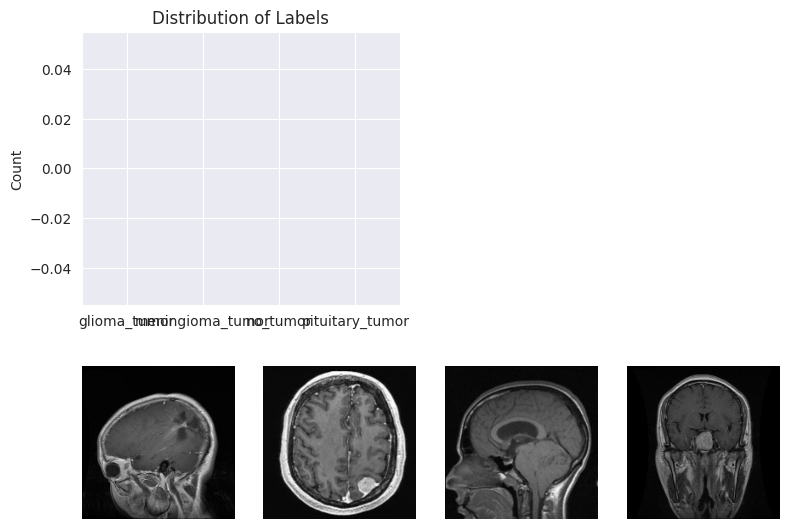

In [10]:
##EDA
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

colors = ["C0", "C1", "C2", "C3"]

# Plot the histogram
plt.subplot(2, 2, 1)
bars = plt.bar(x_train_variable_counts.keys(), x_train_variable_counts.values(), color=colors)
mplcyberpunk.add_bar_gradient(bars=bars)
# plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')

# Plot sample images from each label
k = 0
for i in labels:
    j = 0
    while True:
        if ytrain[j] == i:
            plt.subplot(2, 4, k + 5) 
            plt.imshow(xtrain[j])
            plt.axis('off')
            k += 1
            break
        j += 1
        
plt.tight_layout()
plt.show()

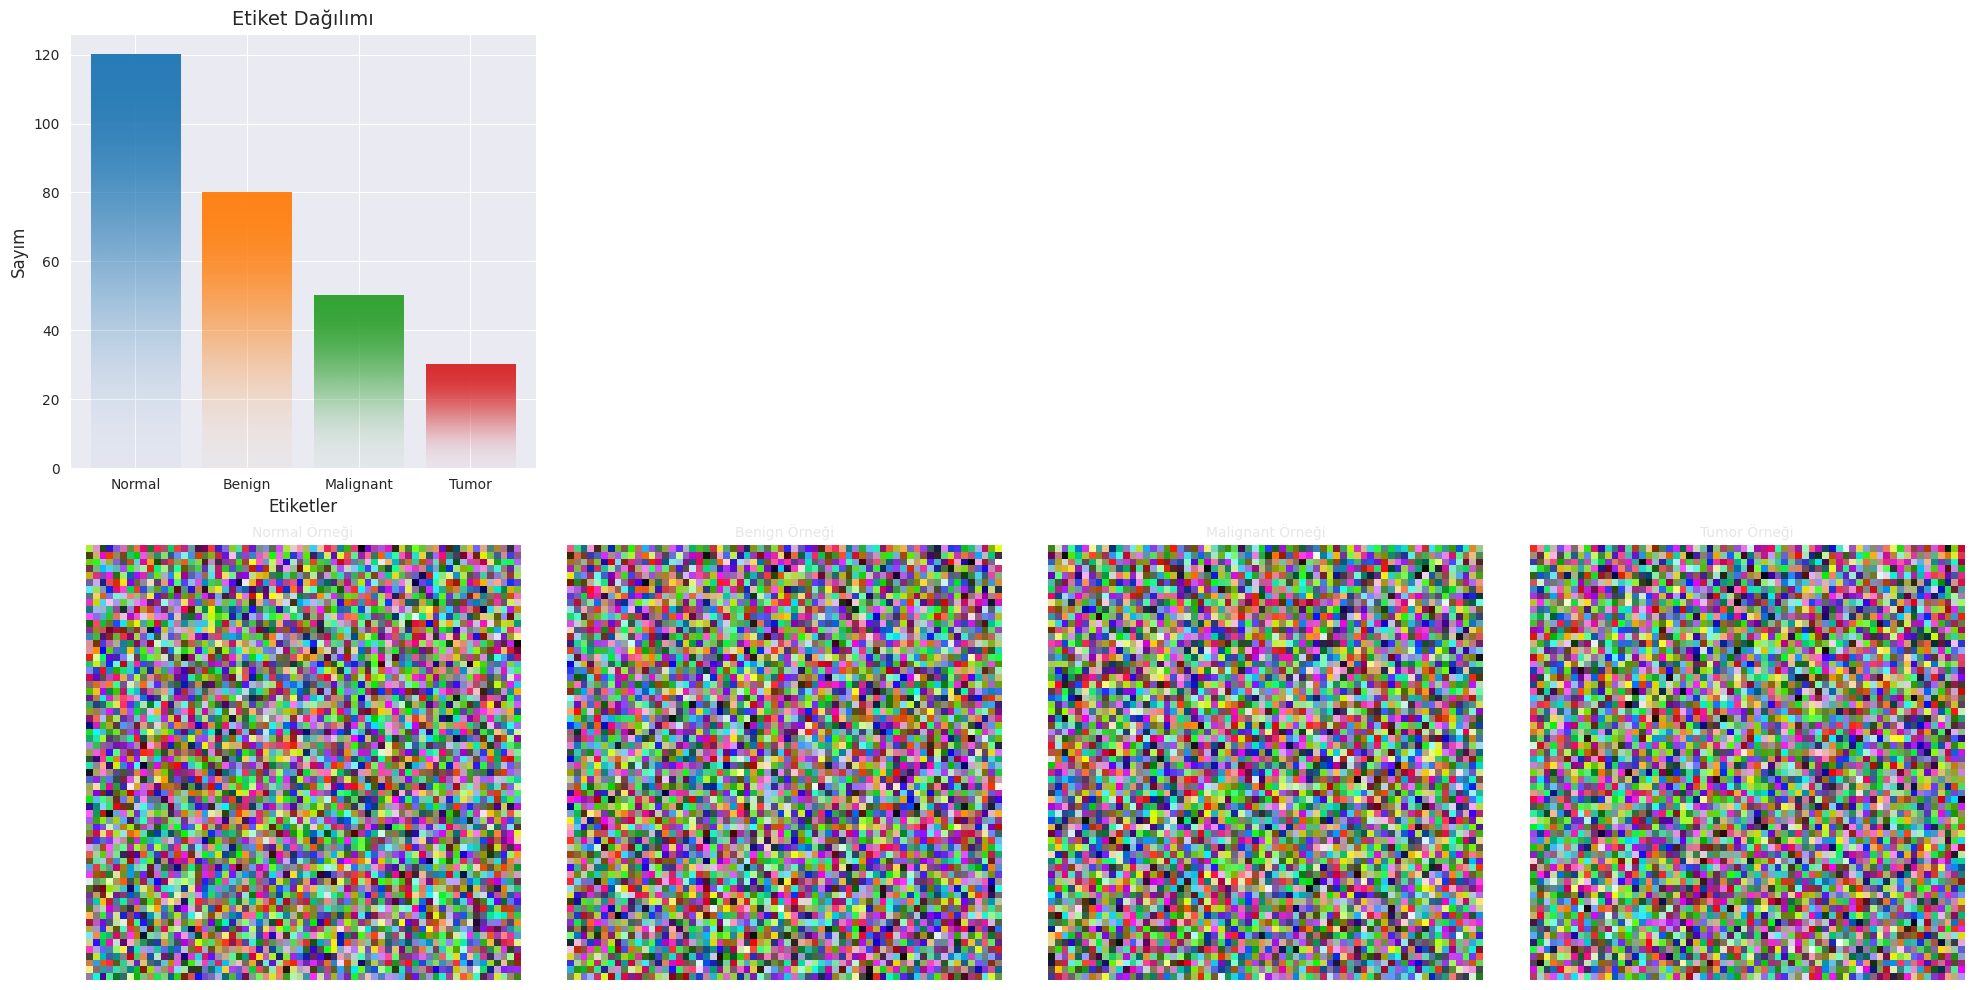

In [11]:
import matplotlib.pyplot as plt
import mplcyberpunk  # Estetik grafikler için (isteğe bağlı)
from collections import defaultdict

# Örnek veri (kendi verilerinizi buraya yerleştirin)
# Etiketlerin dağılımı
x_train_variable_counts = {
    'Normal': 120,
    'Benign': 80,
    'Malignant': 50,
    'Tumor': 30  # Tümör etiketi eklendi
}

labels = list(x_train_variable_counts.keys())

# Örnek ytrain ve xtrain verileri
# Bu verileri kendi verinizle değiştirin
# Örneğin:
# ytrain = ['Normal', 'Benign', 'Malignant', 'Tumor', ...]
# xtrain = [image1, image2, image3, image4, ...]

# Burada rastgele örnek veri oluşturuyorum
import numpy as np

num_samples = sum(x_train_variable_counts.values())
ytrain = []
xtrain = []

# Her etiket için rastgele renkli görüntüler oluşturuyorum
for label, count in x_train_variable_counts.items():
    for _ in range(count):
        ytrain.append(label)
        # 64x64 RGB görüntüleri
        image = np.random.rand(64, 64, 3)
        xtrain.append(image)

# Renkler
colors = ["C0", "C1", "C2", "C3"]

# Figure ayarları
plt.figure(figsize=(20, 10))  # Genişletilmiş boyut

# Histogramı çiz
plt.subplot(2, 4, 1)
bars = plt.bar(x_train_variable_counts.keys(), x_train_variable_counts.values(), color=colors)
mplcyberpunk.add_bar_gradient(bars=bars)
plt.xlabel('Etiketler', fontsize=12)
plt.ylabel('Sayım', fontsize=12)
plt.title('Etiket Dağılımı', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.style.use("cyberpunk")  # Cyberpunk stili (isteğe bağlı)

# Örnek görüntüleri çiz
# Her etiketten birer örnek göstermek için
samples_per_label = 1  # Her etiketten kaç örnek görüntülenecek
current_position = 5  # İlk 4 pozisyon histogram için ayrılmış

# Grup etiketlerine göre indeksleri saklamak için sözlük
label_indices = defaultdict(list)
for idx, label in enumerate(ytrain):
    label_indices[label].append(idx)

# Görüntüleri subplot'lara yerleştir
for label in labels:
    if current_position > 8:
        break  # 2x4 grid dolduysa dur
    indices = label_indices[label]
    if indices:
        img_idx = indices[0]  # İlk örnek
        plt.subplot(2, 4, current_position)
        plt.imshow(xtrain[img_idx])
        plt.axis('off')
        plt.title(f"{label} Örneği", fontsize=10)
        current_position += 1

# Eğer daha fazla görüntü eklemek isterseniz, samples_per_label değerini artırabilirsiniz

plt.tight_layout()
plt.show()


In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    xtrain, ytrain, test_size=0.20, stratify=ytrain, random_state=42)


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Modeli tanımlama
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(labels), activation='softmax')  # Çıkış katmanı, sınıf sayısına göre
])

# Modelin özetini görüntüleme
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,668 (6.20 MB)

 Trainable params: 1,625,668 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

compile time:)

In [14]:
# Modeli derleme
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
import tensorflow as tf
from tensorflow import keras


keras_model = keras.models.Sequential([
    # 1. Konvolüsyon Bloğu
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3), name='Conv1'),
    keras.layers.BatchNormalization(name='BatchNormalization1'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='MaxPooling1'),
    
  
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='Conv2'),
    keras.layers.BatchNormalization(name='BatchNormalization2'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='MaxPooling2'),
    

    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', name='Conv3'),
    keras.layers.BatchNormalization(name='BatchNormalization3'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='MaxPooling3'),
    
  
    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', name='Conv4'),
    keras.layers.BatchNormalization(name='BatchNormalization4'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='MaxPooling4'),

    
    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', name='Conv5'),
    keras.layers.BatchNormalization(name='BatchNormalization5'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='MaxPooling5'),
    
   
    keras.layers.Flatten(name='Flatten'),
    keras.layers.Dense(256, activation='relu', name='Dense1'),
    keras.layers.Dropout(0.3, name='Dropout1'),
    keras.layers.Dense(256, activation='relu', name='Dense2'),
    keras.layers.Dropout(0.3, name='Dropout2'),
    keras.layers.Dense(128, activation='relu', name='Dense3'),
    keras.layers.Dropout(0.3, name='Dropout3'),
    keras.layers.Dense(4, activation='softmax', name='Output')  
])


In [16]:
keras_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNormalization1             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1 (MaxPooling2D)      │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNormalization2             │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2 (MaxPooling2D)      │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNormalization3             │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling3 (MaxPooling2D)      │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4 (Conv2D)                  │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNormalization4             │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling4 (MaxPooling2D)      │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv5 (Conv2D)                  │ (None, 5, 5, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNormalization5             │ (None, 5, 5, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling5 (MaxPooling2D)      │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout1 (Dropout)              │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout2 (Dropout)              │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense3 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout3 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,343,044 (5.12 MB)

 Trainable params: 1,341,572 (5.12 MB)

 Non-trainable params: 1,472 (5.75 KB)

/opt/conda/lib/python3.10/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


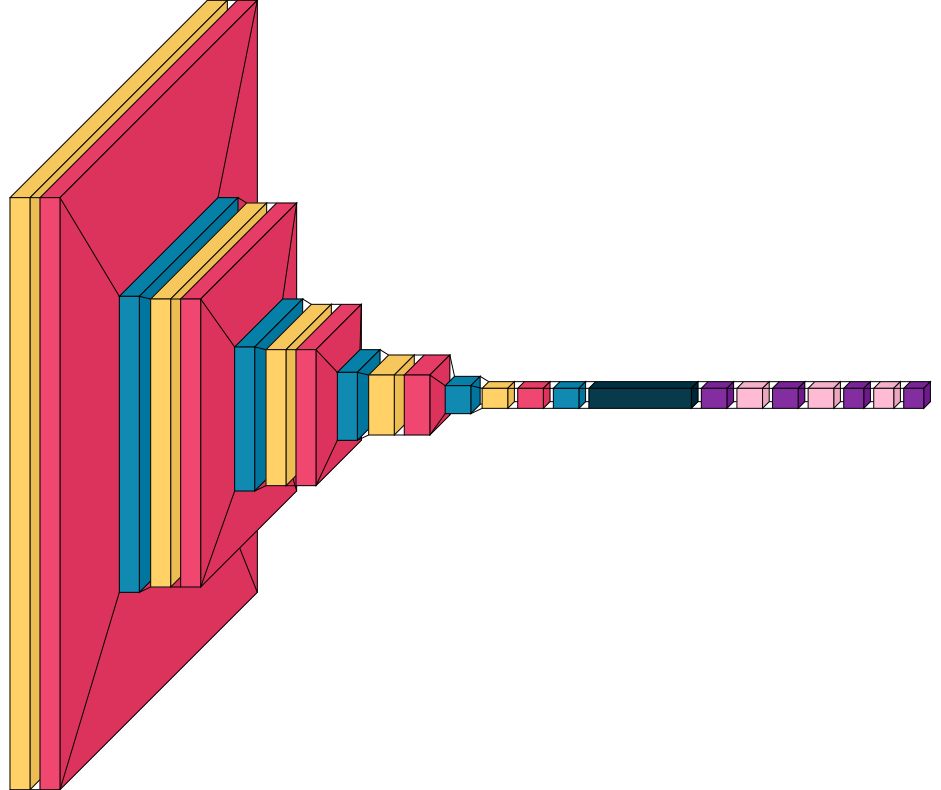

In [17]:
visualkeras.layered_view(keras_model)



In [18]:
keras_model.compile(loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy', 'precision', 'recall', 'auc']
)

In [19]:
keras_model

<Sequential name=sequential_1, built=True>

In [20]:
ytest=np.array(y_test)
xtest=np.array(x_test)

In [21]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
# LabelEncoder'ı başlatma
label_encoder = LabelEncoder()

# Etiketleri sayısal değerlere dönüştürme
ytrain_encoded = label_encoder.fit_transform(ytrain)
ytest_encoded = label_encoder.transform(ytest)




In [22]:
ytest_encoded

array([1, 3, 2, 2, 0, 0, 1, 3, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 0, 1, 3, 0,
       0, 0, 2, 2, 2, 1, 1, 2, 1, 3, 0, 0, 0, 2, 2, 3, 2, 3, 0, 1, 1, 1,
       2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2])

In [23]:
import tensorflow as tf
from tensorflow import keras


keras_model = keras.models.Sequential([
    
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                        input_shape=(150, 150, 3), padding='same', name='Conv1'),
    keras.layers.BatchNormalization(name='BatchNormalization1'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='MaxPooling1'),

   
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
                        padding='same', name='Conv2'),
    keras.layers.BatchNormalization(name='BatchNormalization2'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='MaxPooling2'),

    # 3. Konvolüsyon Bloğu
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',
                        padding='same', name='Conv3'),
    keras.layers.BatchNormalization(name='BatchNormalization3'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='MaxPooling3'),

    # 4. Konvolüsyon Bloğu
    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu',
                        padding='same', name='Conv4'),
    keras.layers.BatchNormalization(name='BatchNormalization4'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='MaxPooling4'),

    # 5. Konvolüsyon Bloğu (Padding 'same' olarak güncellendi)
    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu',
                        padding='same', name='Conv5'),
    keras.layers.BatchNormalization(name='BatchNormalization5'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='MaxPooling5'),

    # Düzleştirme ve Tam Bağlantılı Katmanlar
    keras.layers.Flatten(name='Flatten'),
    keras.layers.Dense(256, activation='relu', name='Dense1'),
    keras.layers.Dropout(0.3, name='Dropout1'),
    keras.layers.Dense(256, activation='relu', name='Dense2'),
    keras.layers.Dropout(0.3, name='Dropout2'),
    keras.layers.Dense(128, activation='relu', name='Dense3'),
    keras.layers.Dropout(0.3, name='Dropout3'),
    keras.layers.Dense(4, activation='softmax', name='Output')  # 4 sınıf için çıkış katmanı
])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Modeli derleme
keras_model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)


In [25]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(ytrain)  
y_test_encoded = label_encoder.transform(ytest)      
# --- One-Hot Encoding ---
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)


print(f"y_train_encoded shape: {y_train_encoded.shape}")        # (num_samples,)
print(f"y_train_categorical shape: {y_train_categorical.shape}")  # (num_samples, 4)


y_train_encoded shape: (280,)
y_train_categorical shape: (280, 4)


In [26]:
# Modeli derleme
keras_model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)


In [27]:
import numpy as np

if isinstance(x_train, list):
    x_train = np.array(x_train)

if isinstance(y_train, list):
    y_train = np.array(y_train)



In [28]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Örnek veri yükleme (Kendi veri setinizi buraya yükleyin)
# x_train, y_train = ... (Örneğin, bir görüntü veri seti)

# Veri Tipini Kontrol Etme ve NumPy Dizisine Dönüştürme
if isinstance(x_train, list):
    x_train = np.array(x_train)

if isinstance(y_train, list):
    y_train = np.array(y_train)

# Veri Ön İşleme
# Görüntü verilerini normalize etme (0-1 aralığı)
x_train = x_train.astype('float32') / 255.0

# Etiketleri Sayısal Hale Getirme (Label Encoding)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # 'Benign' -> 0, 'Malignant' -> 1

# NaN veya Inf Değerlerini Kontrol Etme
assert not np.isnan(x_train).any(), "x_train NaN değerler içeriyor."
assert not np.isinf(x_train).any(), "x_train Inf değerler içeriyor."
assert not np.isnan(y_train_encoded).any(), "y_train_encoded NaN değerler içeriyor."
assert not np.isinf(y_train_encoded).any(), "y_train_encoded Inf değerler içeriyor."

# Giriş Verisinin Şeklini Belirleme
input_shape = x_train.shape[1:]  # Örneğin, (64, 64, 1)
print(f"Giriş Şekli: {input_shape}")

# Modeli Tanımlama
keras_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # İkili sınıflandırma için tek bir çıkış
])

# Model Özeti
keras_model.summary()

# Modeli Derleme
keras_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # İkili sınıflandırma için
    metrics=['accuracy']
)

# EarlyStopping Callback Tanımlama
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Modeli Eğitme
hist = keras_model.fit(
    x_train, y_train_encoded,
    epochs=50,
    validation_split=0.15,
    batch_size=64,
    verbose=1,
    callbacks=[early_stop]
)


Giriş Şekli: (64, 64, 3)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 360ms/step - accuracy: 0.2047 - loss: 0.6745 - val_accuracy: 0.1765 - val_loss: 0.4009
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - accuracy: 0.1696 - loss: 0.3895 - val_accuracy: 0.1765 - val_loss: -0.8948
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - accuracy: 0.2008 - loss: -0.5054 - val_accuracy: 0.1765 - val_loss: -3.9282
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.1910 - loss: -2.0754 - val_accuracy: 0.1765 - val_loss: -10.6979
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 0.1793 - loss: -5.8719 - val_accuracy: 0.1765 - val_loss: -24.5182
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 0.1813 - loss: -12.4103 - val_accuracy: 0.1765 - val_loss: -51.4482
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - accuracy: 0.1774 - loss: -24.5760 - val_accuracy: 0.1765 - val_loss: -100.3193
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.1774 - loss: -50.7241 - val_accuracy

In [29]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

# Örnek veri yükleme (Kendi veri setinizi buraya yükleyin)
# x_train, y_train = ... (Örneğin, bir görüntü veri seti)

# Veri Tipini Kontrol Etme ve NumPy Dizisine Dönüştürme
if isinstance(x_train, list):
    x_train = np.array(x_train)

if isinstance(y_train, list):
    y_train = np.array(y_train)

# Veri Ön İşleme
# Görüntü verilerini normalize etme (0-1 aralığı)
x_train = x_train.astype('float32') / 255.0

# Etiketleri Sayısal Hale Getirme (Label Encoding)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Örneğin, 'Cat', 'Dog', 'Bird' -> 0,1,2

# One-Hot Encoding (Çok Sınıflı Sınıflandırma İçin)
num_classes = len(np.unique(y_train_encoded))
y_train_categorical = to_categorical(y_train_encoded, num_classes=num_classes)

# NaN veya Inf Değerlerini Kontrol Etme
assert not np.isnan(x_train).any(), "x_train NaN değerler içeriyor."
assert not np.isinf(x_train).any(), "x_train Inf değerler içeriyor."
assert not np.isnan(y_train_categorical).any(), "y_train_categorical NaN değerler içeriyor."
assert not np.isinf(y_train_categorical).any(), "y_train_categorical Inf değerler içeriyor."

# Giriş Verisinin Şeklini Belirleme
input_shape = x_train.shape[1:]  # Örneğin, (64, 64, 1)
print(f"Giriş Şekli: {input_shape}")

# Modeli Tanımlama
keras_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Çok sınıflı sınıflandırma için
])

# Model Özeti
keras_model.summary()

# Modeli Derleme
keras_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Çok sınıflı sınıflandırma için
    metrics=['accuracy']
)

# EarlyStopping Callback Tanımlama
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Modeli Eğitme
hist = keras_model.fit(
    x_train, y_train_categorical,
    epochs=50,
    validation_split=0.15,
    batch_size=64,
    verbose=1,
    callbacks=[early_stop]
)


Giriş Şekli: (64, 64, 3)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,716 (2.61 MB)

 Trainable params: 683,716 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 355ms/step - accuracy: 0.2567 - loss: 1.3854 - val_accuracy: 0.5882 - val_loss: 1.3774
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step - accuracy: 0.4051 - loss: 1.3741 - val_accuracy: 0.5882 - val_loss: 1.3453
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step - accuracy: 0.3659 - loss: 1.3426 - val_accuracy: 0.5882 - val_loss: 1.2758
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step - accuracy: 0.4116 - loss: 1.2961 - val_accuracy: 0.5882 - val_loss: 1.2280
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.4195 - loss: 1.2991 - val_accuracy: 0.5882 - val_loss: 1.2441
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.4019 - loss: 1.3157 - val_accuracy: 0.5882 - val_loss: 1.2581
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - accuracy: 0.4313 - loss: 1.2997 - val_accuracy: 0.5882 - val_loss: 1.2668
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 0.4024 - loss: 1.2740 - val_accuracy: 0.5882 - val_loss:

In [30]:
import tensorflow as tf
from tensorflow import keras

class TestSetEvaluator(keras.callbacks.Callback):
    def __init__(self, test_data):
        super(TestSetEvaluator, self).__init__()
        self.test_data = test_data
        self.test_metrics = {}
    
    def on_epoch_end(self, epoch, logs=None):
        x_test, y_test = self.test_data
        results = self.model.evaluate(x_test, y_test, verbose=0)
        for metric, value in zip(self.model.metrics_names, results):
            if metric not in self.test_metrics:
                self.test_metrics[metric] = []
            self.test_metrics[metric].append(value)
        print(f" - Test metrics: {dict(zip(self.model.metrics_names, results))}")

# Test verisini callback'e geçirme
test_evaluator = TestSetEvaluator(test_data=(x_test, y_test_categorical))


In [31]:
import tensorflow as tf
import numpy as np

# Eğer x_test bir liste ise, NumPy dizisine dönüştürün
if isinstance(x_test, list):
    x_test = np.array(x_test)

# Görüntüleri yeniden boyutlandırma (150x150)
x_test_resized = tf.image.resize(x_test, [150, 150]).numpy()

# Normalizasyon (0-1 aralığı)
x_test_resized = x_test_resized.astype('float32') / 255.0

print(f"x_test_resized shape: {x_test_resized.shape}")


x_test_resized shape: (56, 150, 150, 3)


In [32]:
from tensorflow.keras.metrics import Precision, Recall

# Modeli Derleme
keras_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # İkili sınıflandırma için
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)
from tensorflow.keras.metrics import Precision, Recall

# Sınıf sayısını belirleyin (örneğin, 3 sınıf)
num_classes = 3

# Modeli Derleme
keras_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Çok sınıflı sınıflandırma için
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)



In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Sınıf sayısını belirleyin (örneğin, 3 sınıf)
num_classes = 3

# Modeli Tanımlama
keras_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),  # Görüntü verisini düzleştirir
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Çok sınıflı sınıflandırma için
])

# Model Özeti
keras_model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,739 (18.42 MB)

 Trainable params: 4,828,739 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Etiketleri sayısal hale getirme
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Örneğin, 'Cat', 'Dog', 'Bird' -> 0,1,2
y_test_encoded = label_encoder.transform(y_test)

# One-Hot Encoding
num_classes = len(np.unique(y_train_encoded))
y_train_categorical = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes=num_classes)


In [35]:
print(hist.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [36]:
from tensorflow.keras.metrics import Precision, Recall

# Sınıf sayısını belirleyin (örneğin, 3 sınıf)
num_classes = 3

# Modeli Derleme
keras_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Çok sınıflı sınıflandırma için uygun
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,587 (2.61 MB)

 Trainable params: 683,587 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.3172 - loss: 1.1398 - precision: 0.2331 - recall: 0.0212 - val_accuracy: 0.3000 - val_loss: 1.1011 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.3490 - loss: 1.0967 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.3000 - val_loss: 1.0993 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.3582 - loss: 1.0976 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.3400 - val_loss: 1.0988 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.3139 - loss: 1.0989 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.3000 - val_loss: 1.1025 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.3583 - loss: 1.1019 - precision: 0.000

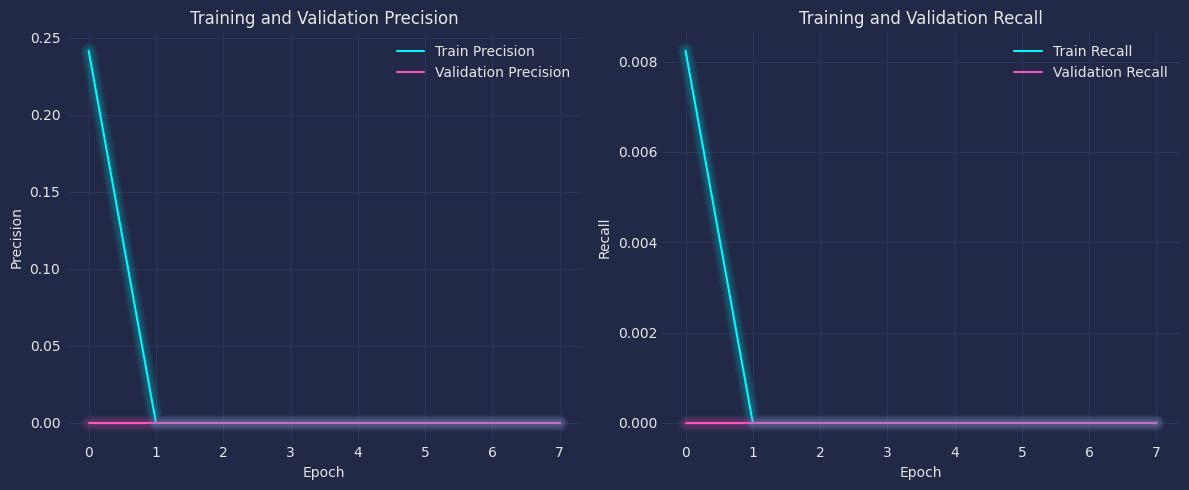

In [37]:
import tensorflow as tf; from tensorflow.keras.models import Sequential; from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout; from tensorflow.keras.metrics import Precision, Recall; from tensorflow.keras.callbacks import EarlyStopping; from sklearn.preprocessing import LabelEncoder; from tensorflow.keras.utils import to_categorical; import numpy as np; import matplotlib.pyplot as plt; import mplcyberpunk

# Veri Yükleme (Örneğin, Kendi Veri Setinizi Yükleyin)
# x_train, y_train, x_test, y_test = ... 

# Örnek Veri Seti Oluşturma (Bu kısmı kendi veri setinizle değiştirin)
# Aşağıda rastgele veriler kullanılmıştır.
num_samples = 1000
img_height, img_width, channels = 64, 64, 3
num_classes = 3

x_train = np.random.rand(num_samples, img_height, img_width, channels).astype('float32')
y_train = np.random.choice(['Cat', 'Dog', 'Bird'], size=num_samples)
x_test = np.random.rand(int(num_samples*0.2), img_height, img_width, channels).astype('float32')
y_test = np.random.choice(['Cat', 'Dog', 'Bird'], size=int(num_samples*0.2))

# Etiketleri Sayısal Hale Getirme
label_encoder = LabelEncoder(); y_train_encoded = label_encoder.fit_transform(y_train); y_test_encoded = label_encoder.transform(y_test)

# One-Hot Encoding (Çok Sınıflı Sınıflandırma İçin)
y_train_categorical = to_categorical(y_train_encoded, num_classes=num_classes); y_test_categorical = to_categorical(y_test_encoded, num_classes=num_classes)

# Modeli Tanımlama
keras_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Modeli Derleme
keras_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

# Model Özeti
keras_model.summary()

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Modeli Eğitme
hist = keras_model.fit(
    x_train, y_train_categorical,
    epochs=50,
    validation_split=0.15,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)

# Eğitim Geçmişini Kontrol Etme
print(hist.history.keys())

# Precision ve Recall Grafikleri
plt.figure(figsize=(12, 5))

# Precision Grafiği
plt.subplot(1, 2, 1)
plt.plot(hist.history['precision'], label='Train Precision')
plt.plot(hist.history['val_precision'], label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
mplcyberpunk.make_lines_glow()

# Recall Grafiği
plt.subplot(1, 2, 2)
plt.plot(hist.history['recall'], label='Train Recall')
plt.plot(hist.history['val_recall'], label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
mplcyberpunk.make_lines_glow()

plt.tight_layout()
plt.show()
